In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import integrate, optimize
from scipy.stats import linregress

from QM_module import rk4,tol_rk4,secant,integrate_data,normalize

In [4]:
def deriv_f(t,X,E):
    dx1 = X[1]
    dx2 = (V(X[0])-E)*X[0]
    return np.array([dx1,dx2])

def V(x):
    return 0 #Only 0 because we are only simulating for -1/2 to 1/2

V = np.vectorize(V)

In [5]:
def shoot_e(e_dom,X0=[0,1],x_dom=[-1/2,1/2],h=1):
    e_list = np.arange(e_dom[0],e_dom[1]+h,h)
    
    u1_list = []
    for i in range(len(e_list)):
        E = e_list[i]
        n,X,Y = tol_rk4(deriv_f,x_dom[0],x_dom[1],X0,1e6,1e-2,{'E':E})
        Y = normalize(X,Y)
        u1_list.append(Y[-1,0])
        
    u1_list = np.array(u1_list)
    return e_list,u1_list

In [6]:
e_l,u1_l = shoot_e([0,300],h=5)

idx = np.where(np.sign(u1_l[:-1]) != np.sign(u1_l[1:]))[0] + 1

print('E =',e_l[idx])
print('n =',np.sqrt(e_l[idx]/np.pi**2))

E = [ 10  40  90 160 250]
n = [1.00658424 2.01316848 3.01975273 4.02633697 5.03292121]


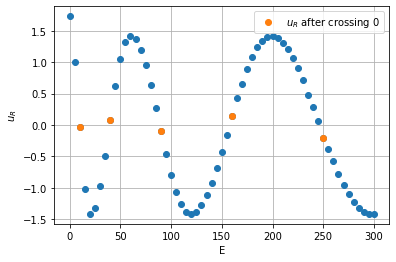

In [7]:
plt.plot(e_l,u1_l,'o')
plt.plot(e_l[idx],u1_l[idx],'o',label='$u_R$ after crossing 0')
plt.xlabel('E')
plt.ylabel('$u_R$')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
def f_sec(e):
    n,X,Y = tol_rk4(deriv_f,-1/2,1/2,[0,1],1e6,1e-6,{'E':e})
    Y = normalize(X,Y)
    return Y[-1,0]

In [9]:
e_guess = e_l[idx]
print('Index where u_r cross 0 =',idx)

print('E guess =',e_guess)

Index where u_r cross 0 = [ 2  8 18 32 50]
E guess = [ 10  40  90 160 250]


In [10]:
e_eig = []
for i in idx:
#     e_secant = optimize.root_scalar(f_sec,args=(),method='secant',x0=e_l[i],x1=e_l[i-1],xtol=1e-5).root
    e_secant = secant(f_sec,e_l[i],e_l[i-1],1e-5)
    e_eig.append(e_secant)
    
e_eig = np.array(e_eig)
print('Energy eigenvalues:',e_eig)

Energy eigenvalues: [  9.86960247  39.47840986  88.82640043 157.91364236 246.74003368]


In [11]:
def analytic_f(x,n):
    if n%2 != 0:
        return np.sqrt(2)*np.cos(n*np.pi*x)
    else:
        return np.sqrt(2)*np.sin(n*np.pi*x)

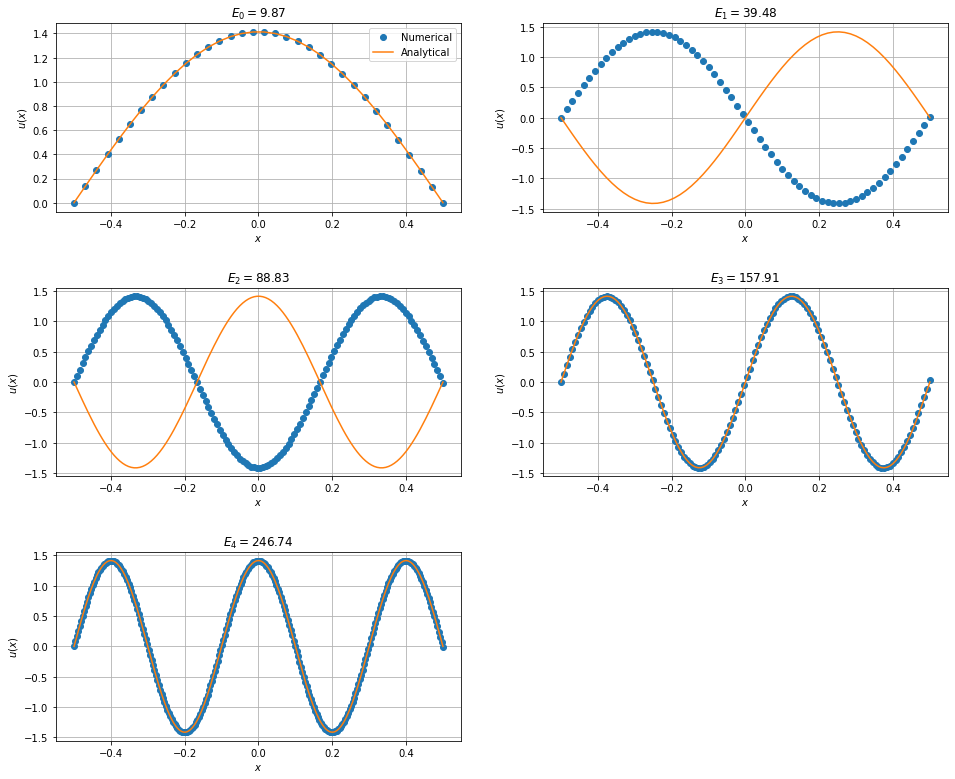

In [12]:
# 2(a)(iv)

n_plts = len(e_eig)
rows = int(np.ceil(n_plts/2))

fig, ax = plt.subplots(rows,2,figsize=(16,rows*4.4))
plt.subplots_adjust(hspace = 0.4)

for i in range(n_plts):
    plt_m = i%2
    plt_n = i//2
    
    E = e_eig[i]
    n_i,X_i,Y_i = tol_rk4(deriv_f,-1/2,1/2,[0,1],1e6,1e-2,{'E':E})
    Y_i = normalize(X_i,Y_i)[:,0]
    ax[plt_n][plt_m].plot(X_i,Y_i,'o',label='Numerical')
    ax[plt_n][plt_m].plot(X_i,analytic_f(X_i,i+1),label='Analytical')
    ax[plt_n][plt_m].set_xlabel('$x$')
    ax[plt_n][plt_m].set_ylabel('$u(x)$')
    ax[plt_n][plt_m].set_title(f'$E_{i}={np.round(E,2)}$')
    if i == 0: ax[plt_n][plt_m].legend()
    ax[plt_n][plt_m].grid(True)

if n_plts%2 != 0: fig.delaxes(ax[rows-1][1])
plt.show()

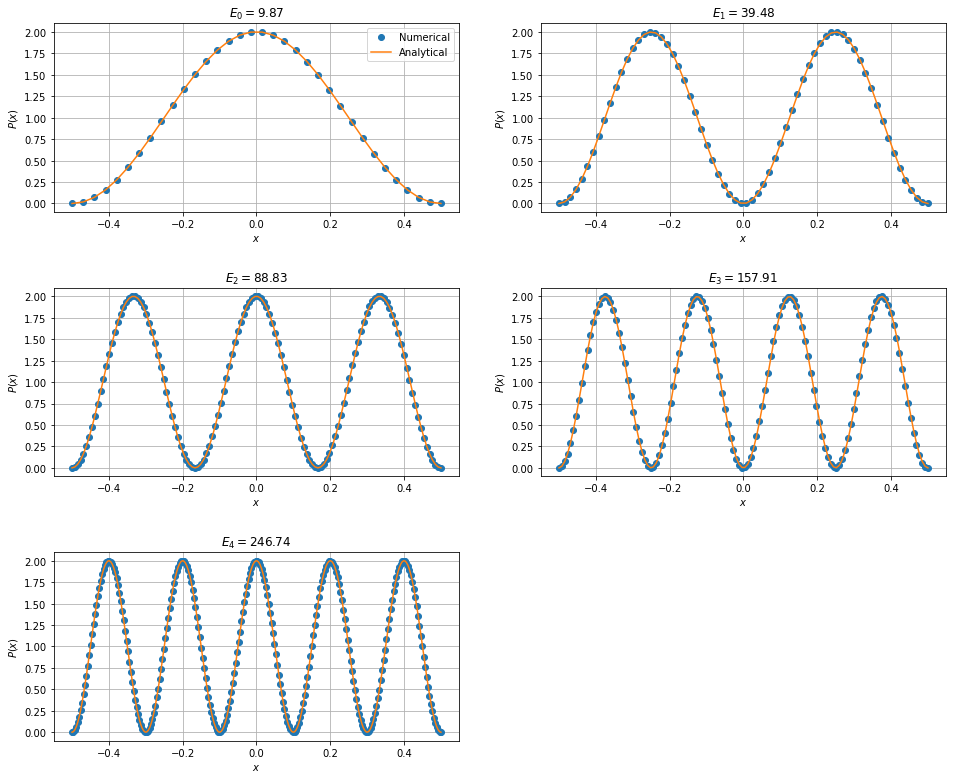

In [13]:
# 2(c)

fig, ax = plt.subplots(rows,2,figsize=(16,rows*4.4))
plt.subplots_adjust(hspace = 0.4)

for i in range(n_plts):
    plt_m = i%2
    plt_n = i//2
    
    E = e_eig[i]
    n_i,X_i,Y_i = tol_rk4(deriv_f,-1/2,1/2,[0,1],1e6,1e-2,{'E':E})
    Y_i = normalize(X_i,Y_i)[:,0]
    ax[plt_n][plt_m].plot(X_i,np.abs(Y_i)**2,'o',label='Numerical')
    ax[plt_n][plt_m].plot(X_i,np.abs(analytic_f(X_i,i+1))**2,label='Analytical')
    ax[plt_n][plt_m].set_xlabel('$x$')
    ax[plt_n][plt_m].set_ylabel('$P(x)$')
    ax[plt_n][plt_m].set_title(f'$E_{i}={np.round(E,2)}$')
    if i == 0: ax[plt_n][plt_m].legend()
    ax[plt_n][plt_m].grid(True)

if n_plts%2 != 0: fig.delaxes(ax[rows-1][1])
plt.show()

Slope = 9.869601574294911
Intercept = 4.43530183247276e-07

Analytical Slope = π^2 = 9.869604401089358
Anaytical Intercept = 0


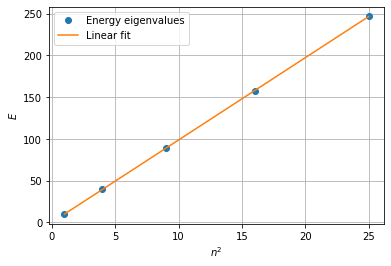

In [14]:
# 2(b)

n_sq_list = np.arange(1,6)**2

linreg = linregress(n_sq_list,e_eig)
m = linreg.slope
c = linreg.intercept
print('Slope =',m)
print('Intercept =',c)

print('\nAnalytical Slope = π^2 =',np.pi**2)
print('Anaytical Intercept =',0)

plt.plot(n_sq_list,e_eig,'o',label='Energy eigenvalues')
plt.plot(n_sq_list,n_sq_list*m+c,label='Linear fit')
plt.xlabel('$n^2$')
plt.ylabel('$E$')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
def truncate_significant(x_list,n):
#     x_list_sig = [np.round(i,n-1 - int(np.floor(np.log10(abs(i))))) for i in x_list]
    x_list_sig_str = [str(x)[:n+1] for x in x_list]
    x_list_sig_str_zfill = [x[::-1].zfill(n-1)[::-1] for x in x_list_sig_str]
    return x_list_sig_str_zfill

truncate_significant([9.40075, 37.603, 84.6068, 150.412, 235.019],8)

['9.40075', '37.6030', '84.6068', '150.412', '235.019']

In [16]:
def E_table(m,L,e_eig,len_label='L',particle='electron'):
    h_bar = 1.0545718e-34
    eV = 1.6021766e-19
    n_sq_list = np.arange(1,len(e_eig)+1)**2
    energy_true = n_sq_list*np.pi**2*h_bar**2/(2*m*L**2)/eV
    energy_num = e_eig*h_bar**2/(2*m*L**2)/eV
    
    energy_num_sig_str = truncate_significant(energy_num,6)
    energy_true_sig_str = truncate_significant(energy_true,6)
    
    tbl = pd.DataFrame({'Analytical':energy_true_sig_str,'Numerical':energy_num_sig_str})
    
    print(f'For {particle} in well of length {len_label}, table for energy eigenvalues E(eV) (6 significant digits)')
    display(tbl)

In [17]:
def find_prob(x_dom,E_n,L,rk_tol):
    x_dom = np.array(x_dom)/L
    n_i,X_i,Y_i = tol_rk4(deriv_f,-1/2,1/2,[0,1],1e6,rk_tol,{'E':E_n})
    Y_i = normalize(X_i,Y_i)[:,0]
    
    Y_prob = np.abs(Y_i)**2
    idx = np.where((X_i >= x_dom[0]) & (X_i <= x_dom[1]))
    
    prob = integrate_data(X_i[idx],Y_prob[idx])
    return prob

def find_prob_tol(x_dom,E_n,L,tol,rk_tol_max=0.5e-11):
    rk_tol = tol
    while True:
        p0 = find_prob(x_dom,E_n,L,rk_tol)
        rk_tol *= 0.5
        p1 = find_prob(x_dom,E_n,L,rk_tol)
        
        if np.abs(p0-p1) < tol:
            break
        elif rk_tol*0.5 <= rk_tol_max:
            print('RK max tolerence (0.5e-11) reached without reaching probability tolerence.')
            break
    return p1


def find_prob_analytical(x_dom,n,L):
    x_dom = np.array(x_dom)/L
    if n%2 != 0:
        f = lambda x: x+np.sin(2*n*np.pi*x)/(2*n*np.pi)
    else:
        f = lambda x: x-np.sin(2*n*np.pi*x)/(2*n*np.pi)
        
    return f(x_dom[1])-f(x_dom[0])


def print_prob(e_eig,x_dom,L,tol,rk_tol_max=0.5e-11,len_label='L',particle='electron'):
    print(f'For {particle} in well of L={len_label},the probability\nof finding it in x ∈ [-3L/8,L/4] -\n')
    print('    Ground State:')
    
    print('\tP numerical =',find_prob_tol(x_dom,e_eig[0],L,tol,rk_tol_max))
    print('\tP anaytical =',find_prob_analytical(x_dom,1,L))
    print('\n    First Excited State:')
    print('\tP numerical =',find_prob_tol(x_dom,e_eig[1],L,tol,rk_tol_max))
    print('\tP anaytical =',find_prob_analytical(x_dom,2,L))
 

m_electron = 9.1093837e-31
L0 = 2e-10

# 2(d)
E_table(m_electron,L0,e_eig,len_label='2Å',particle='electron')
print('\n')

# 2(e)
print_prob(e_eig,[-3*L0/8,L0/4],L0,1e-6,len_label='2Å')

For electron in well of length 2Å, table for energy eigenvalues E(eV) (6 significant digits)


,Analytical,Numerical
0,9.40075,9.40075
1,37.6030,37.6030
2,84.6067,84.6067
3,150.412,150.412
4,235.018,235.018




For electron in well of L=2Å,the probability
of finding it in x ∈ [-3L/8,L/4] -

    Ground State:
	P numerical = 0.8964839206437678
	P anaytical = 0.8966944826115336

    First Excited State:
	P numerical = 0.7042520067170572
	P anaytical = 0.7045774715459476


In [18]:
# 2(f)
    
L1 = 10e-10

E_table(m_electron,L1,e_eig,len_label='10Å',particle='electron')
print('\n')
print_prob(e_eig,[-3*L1/8,L1/4],L1,1e-6,len_label='10Å')

For electron in well of length 10Å, table for energy eigenvalues E(eV) (6 significant digits)


,Analytical,Numerical
0,0.37603,0.37603
1,1.50412,1.50412
2,3.38427,3.38426
3,6.01648,6.01648
4,9.40075,9.40075




For electron in well of L=10Å,the probability
of finding it in x ∈ [-3L/8,L/4] -

    Ground State:
	P numerical = 0.8964839206437678
	P anaytical = 0.8966944826115336

    First Excited State:
	P numerical = 0.7042520067170572
	P anaytical = 0.7045774715459476


In [19]:
m_proton = 1.6726219e-27
L2 = 5e-15

E_table(m_proton,L2,e_eig,len_label='5fm',particle='proton')

print('\n')
print_prob(e_eig,[-3*L2/8,L2/4],L2,1e-6,len_label='5fm',particle='proton')

For proton in well of length 5fm, table for energy eigenvalues E(eV) (6 significant digits)


,Analytical,Numerical
0,8191697,8191695
1,3276678,3276678
2,7372527,7372524
3,1310671,1310671
4,2047924,2047923




For proton in well of L=5fm,the probability
of finding it in x ∈ [-3L/8,L/4] -

    Ground State:
	P numerical = 0.8964839206437678
	P anaytical = 0.8966944826115336

    First Excited State:
	P numerical = 0.7042520067170572
	P anaytical = 0.7045774715459476
